# How

- I joined a free class in [GSX](https://www.genshuixue.com/) and the class started from May 16th - May 18th.
- I followed the Appendex I from [Muddy Water Reserach Report](https://www.muddywatersresearch.com/research/gsx/mw-is-short-gsx/) and download message log file.
- I unzipped it into `all.json`.
- This class started at `05.18 19:40 - 20:20`

In [20]:
DATA_ROOT_PATH = '/src/data/gsx/6004241052268286'
FILENAME = 'all.json'

In [21]:
import numpy as np
import math
import os.path
import json
import time

In [22]:
with open(os.path.join(DATA_ROOT_PATH, FILENAME)) as jsonFile:
    msgLog = json.load(jsonFile)

In [23]:
# extract id and joinTime from the 'from' field
loginDict = dict()
for item in msgLog:
    userInfo = item.get('from')
    if userInfo is not None and userInfo.get('joinTime') is not None:
        loginDict[userInfo.get('id')] = userInfo.get('joinTime')

In [24]:
# The dictioanry with user ID as key and joinTime as value.
print(loginDict)

{'103094746': 1589798533, '103094851': 1589798690, '103094929': 1589798812, '103094944': 1589798834, '103094965': 1589798857, '103095061': 1589798953, '103095043': 1589798948, '103094794': 1589798587, '103095349': 1589799369, '103097368': 1589799762, '103098046': 1589799824, '103099492': 1589799947, '103098967': 1589799899, '103099927': 1589799982, '103099957': 1589799984, '103101094': 1589800080, '103101049': 1589800076, '103101505': 1589800111, '103100752': 1589800051, '103101820': 1589800135, '103102033': 1589800150, '103102612': 1589800192, '103103041': 1589800227, '103103359': 1589800252, '103102039': 1589800151, '103095064': 1589798967, '103098049': 1589799820, '103104853': 1589800360, '103102570': 1589800189, '103106413': 1589800481, '103099123': 1589799911, '103095262': 1589799268, '103100800': 1589800049, '103098382': 1589799853, '103095046': 1589798948, '103106989': 1589800522, '103109134': 1589800656, '103109809': 1589800694, '103108417': 1589800615, '103110874': 1589800765,

In [25]:
print(len(loginDict))

236


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

x = loginDict.keys()
y = loginDict.values()
y_np = np.array(list(y), dtype=np.int32)
from scipy import stats
stats.describe(y_np)


DescribeResult(nobs=236, minmax=(1589798533, 1589812323), mean=1589802890.3559322, variance=7678784.085539128, skewness=1.038969278333795, kurtosis=0.7180196723134626)

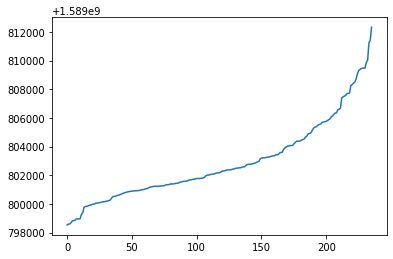

In [27]:
y_np_sorted = np.sort(y_np)
plt.plot(y_np_sorted)

In [28]:
print(y_np_sorted)

[1589798533 1589798587 1589798604 1589798690 1589798812 1589798834
 1589798857 1589798948 1589798948 1589798953 1589798967 1589799268
 1589799369 1589799762 1589799820 1589799824 1589799853 1589799899
 1589799911 1589799947 1589799982 1589799984 1589800049 1589800051
 1589800076 1589800080 1589800111 1589800135 1589800150 1589800151
 1589800189 1589800192 1589800227 1589800252 1589800360 1589800481
 1589800521 1589800522 1589800562 1589800599 1589800615 1589800656
 1589800694 1589800730 1589800765 1589800797 1589800821 1589800851
 1589800862 1589800879 1589800889 1589800897 1589800899 1589800919
 1589800927 1589800935 1589800941 1589800976 1589800990 1589801003
 1589801026 1589801064 1589801073 1589801130 1589801170 1589801190
 1589801209 1589801225 1589801226 1589801227 1589801231 1589801239
 1589801249 1589801259 1589801260 1589801268 1589801324 1589801335
 1589801336 1589801365 1589801390 1589801394 1589801395 1589801410
 1589801424 1589801433 1589801458 1589801520 1589801522 158980

In [29]:
firstDiff = np.diff(y_np_sorted)
# first difference in seconds
print(firstDiff)

[  54   17   86  122   22   23   91    0    5   14  301  101  393   58
    4   29   46   12   36   35    2   65    2   25    4   31   24   15
    1   38    3   35   25  108  121   40    1   40   37   16   41   38
   36   35   32   24   30   11   17   10    8    2   20    8    8    6
   35   14   13   23   38    9   57   40   20   19   16    1    1    4
    8   10   10    1    8   56   11    1   29   25    4    1   15   14
    9   25   62    2   39    9    7    9   11   69   11    8   30    2
   27   25    1    1    5   15   23   41   95   55    3   20   33    3
   10   29   41   17    1   32   41   66    0    8   53    4   11    2
   14   36    6   50    1   21    7    9   34   28    6   81   82    5
   12    0   35    9   38   37   33   38  165   68   18    7    3   24
   22    4   31   32   18    7   61    6   27   91   44    8  190   98
   77   60   26   17    2    4  106   91   98    4   10   18   46   50
   32  139   58  152   44   20  160  152   97   16   76   74   38   38
  104 

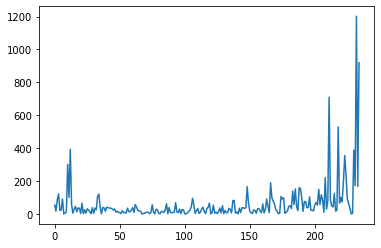

In [30]:
plt.plot(firstDiff)

In [31]:
y_np_min = np.min(y_np)
y_np_max = np.max(y_np)
print("min:%d, max:%d" % (y_np_min, y_np_max))

min:1589798533, max:1589812323


In [32]:
from datetime import datetime as dt
import time
from datetime import tzinfo as tz
from datetime import timezone 
from datetime import timedelta

UTC0800=timezone(+timedelta(hours=8, minutes=0))

def get_datetime_utc0800(timestamp):
    return dt.fromtimestamp(timestamp, tz=UTC0800)

In [33]:
# print sorted login time
for y in y_np_sorted:
    print(get_datetime_utc0800(y))

2020-05-18 18:42:13+08:00
2020-05-18 18:43:07+08:00
2020-05-18 18:43:24+08:00
2020-05-18 18:44:50+08:00
2020-05-18 18:46:52+08:00
2020-05-18 18:47:14+08:00
2020-05-18 18:47:37+08:00
2020-05-18 18:49:08+08:00
2020-05-18 18:49:08+08:00
2020-05-18 18:49:13+08:00
2020-05-18 18:49:27+08:00
2020-05-18 18:54:28+08:00
2020-05-18 18:56:09+08:00
2020-05-18 19:02:42+08:00
2020-05-18 19:03:40+08:00
2020-05-18 19:03:44+08:00
2020-05-18 19:04:13+08:00
2020-05-18 19:04:59+08:00
2020-05-18 19:05:11+08:00
2020-05-18 19:05:47+08:00
2020-05-18 19:06:22+08:00
2020-05-18 19:06:24+08:00
2020-05-18 19:07:29+08:00
2020-05-18 19:07:31+08:00
2020-05-18 19:07:56+08:00
2020-05-18 19:08:00+08:00
2020-05-18 19:08:31+08:00
2020-05-18 19:08:55+08:00
2020-05-18 19:09:10+08:00
2020-05-18 19:09:11+08:00
2020-05-18 19:09:49+08:00
2020-05-18 19:09:52+08:00
2020-05-18 19:10:27+08:00
2020-05-18 19:10:52+08:00
2020-05-18 19:12:40+08:00
2020-05-18 19:14:41+08:00
2020-05-18 19:15:21+08:00
2020-05-18 19:15:22+08:00
2020-05-18 1

## Find the Precise Joiner

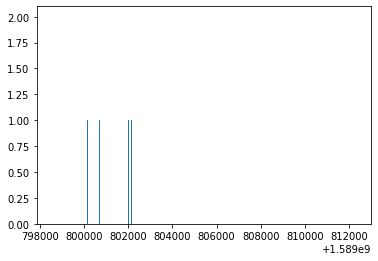

In [34]:
# I bucketed loginTime by 329 bins. It is more than enough.
n, bins, patches = plt.hist(y_np_sorted, range(y_np_min, y_np_max))

In [35]:
print(n)
print(len(n))
print(bins)
print(len(bins))
print(patches)

[1. 0. 0. ... 0. 0. 0.]
13789
[1589798533 1589798534 1589798535 ... 1589812320 1589812321 1589812322]
13790
<a list of 13789 Patch objects>


In [36]:
n_indexes = list()

for index in range(len(n)):
    if n[index] > 1:
        n_indexes.append(index)
print(n_indexes)

[415, 3768, 4238, 10938]


In [37]:
len(n_indexes)

4

In [38]:
duplicate_logintime = np.asarray(bins[n_indexes])

In [39]:
duplicate_logintime_ids = list()
for logintime in duplicate_logintime:
    for k, v in loginDict.items():
        if v == logintime:
            duplicate_logintime_ids.append(k)

In [40]:
print(duplicate_logintime)
print(len(duplicate_logintime))

[1589798948 1589802301 1589802771 1589809471]
4


In [41]:
print(duplicate_logintime_ids)
print(len(duplicate_logintime_ids))

['103095043', '103095046', '103153438', '103153363', '103185166', '103185286', '103381195', '103381228']
8


In [42]:
# the odd that they login at the same time
1/abs(y_np_min - y_np_max)

7.25163161711385e-05

In [43]:
for id in duplicate_logintime_ids:
    print('ID: %s, Login Time: %s' % (id, get_datetime_utc0800(loginDict[id])))

ID: 103095043, Login Time: 2020-05-18 18:49:08+08:00
ID: 103095046, Login Time: 2020-05-18 18:49:08+08:00
ID: 103153438, Login Time: 2020-05-18 19:45:01+08:00
ID: 103153363, Login Time: 2020-05-18 19:45:01+08:00
ID: 103185166, Login Time: 2020-05-18 19:52:51+08:00
ID: 103185286, Login Time: 2020-05-18 19:52:51+08:00
ID: 103381195, Login Time: 2020-05-18 21:44:31+08:00
ID: 103381228, Login Time: 2020-05-18 21:44:31+08:00
